# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [Music Dataset](https://dlsu.instructure.com/courses/190312/files/22525897). The original dataset contains a total of 17997 rows and 17 features. The features contain metadata, performance metrics and track details.

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the ~18k rows in the dataset represents a musical track. Their 17 columns represent the dataset features. These features include (feature descriptions sourced from the included PDF file):

## Features

- **Artist Name** - Name of artist
  
- **Track Name** - Name of song 
- **Popularity** - a value between 0 and 100, with 100 being the most popular. The popularity is calculated by an algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. 
- **danceability** - describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
- **energy** - a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
- **key** - The key the track is in. Integers map to pitches using standard Pitch Class notation. If no key was detected, the value is -1. 
- **loudness** - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. 
- **mode** - indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. 
- **speechiness** - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
- **instrumentalness** - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. STINTSY T1AY2425 
- **liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 
- **valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry). 
- **tempo** - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- **duration_in min/ms** - Duration in ms. 
- **time_signature** - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of “3/4”, to “7/4”. 
- **Class** - corresponds to the genre of the track.



# Importing the following libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Reading and collecting a brief overview of the dataset

In [2]:
df = pd.DataFrame()
df = pd.read_csv("Dataset 6 - Music Dataset/Dataset 6 - Music Dataset/music.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [3]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [5]:
datatypes = df.dtypes
datatypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

# Cleaning the dataset

In [6]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [7]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep = 'first', inplace = False) 

# Drop rows with null popularity
df = df.dropna(subset=["Popularity"])

# Drop columns with high null values
df = df.drop(columns=["instrumentalness"])

new_length = len(df)

(str(old_length - new_length) + " rows were dropped")

'428 rows were dropped'

### As mentioned in the PDF, values where a key was not detected will be set to -1

In [8]:
na_key_df = df[pd.isna(df['key'])]
print("Null keys = "+str(len(na_key_df)))

key_df = df[df['key'] == -1]
print("-1 Keys = "+str(len(key_df)))

Null keys = 1955
-1 Keys = 0


### Look through dataset for multiple representations and to understand the values better

In [9]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


Artist Name column is being written
Artist Name has been written
Track Name column is being written
Track Name has been written
Popularity column is being written
Popularity has been written
danceability column is being written
danceability has been written
energy column is being written
energy has been written
key column is being written
key has been written
loudness column is being written
loudness has been written
mode column is being written
mode has been written
speechiness column is being written
speechiness has been written
acousticness column is being written
acousticness has been written
liveness column is being written
liveness has been written
valence column is being written
valence has been written
tempo column is being written
tempo has been written
duration_in min/ms column is being written
duration_in min/ms has been written
time_signature column is being written
time_signature has been written
Class column is being written
Class has been written
Data exported to 'dumps/

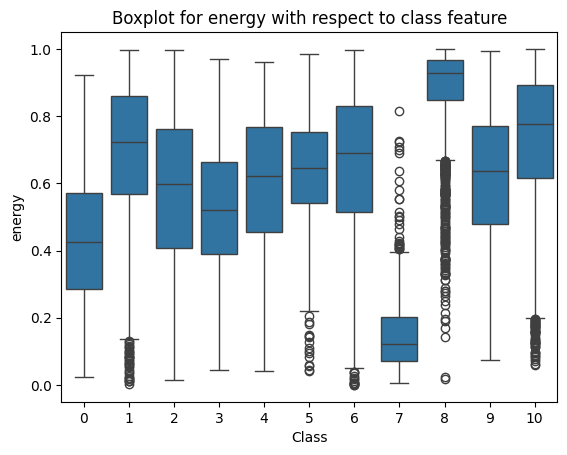

<Figure size 400x600 with 0 Axes>

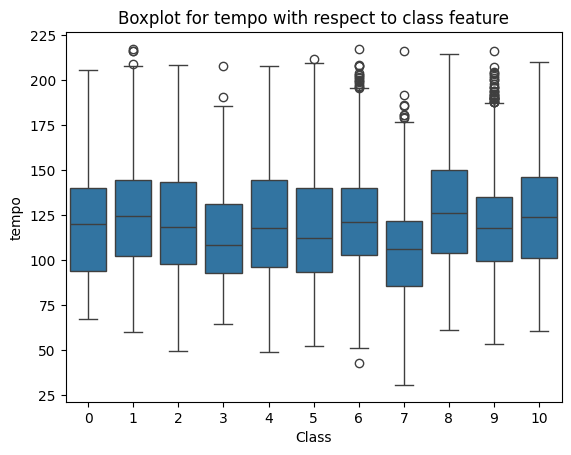

<Figure size 400x600 with 0 Axes>

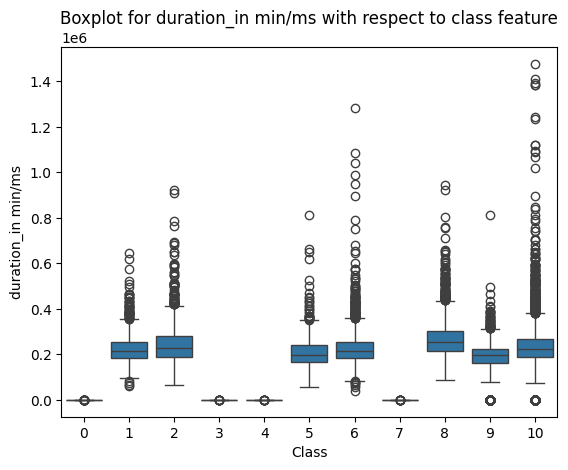

<Figure size 400x600 with 0 Axes>

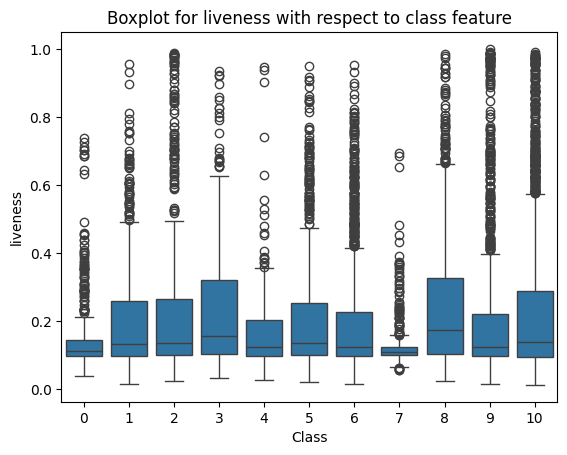

<Figure size 400x600 with 0 Axes>

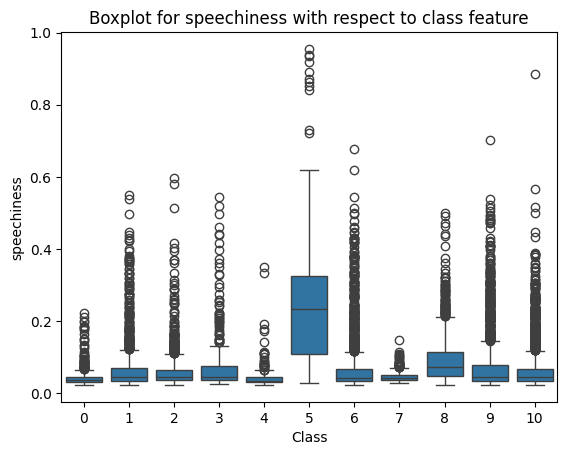

<Figure size 400x600 with 0 Axes>

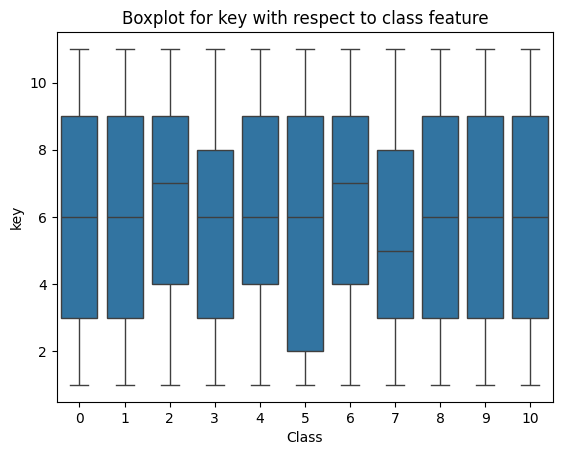

<Figure size 400x600 with 0 Axes>

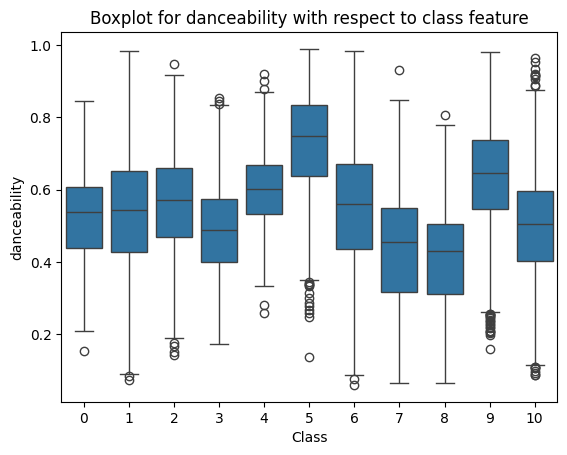

<Figure size 400x600 with 0 Axes>

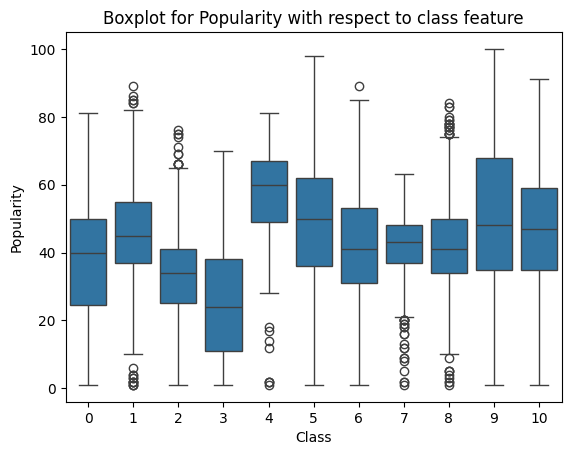

<Figure size 400x600 with 0 Axes>

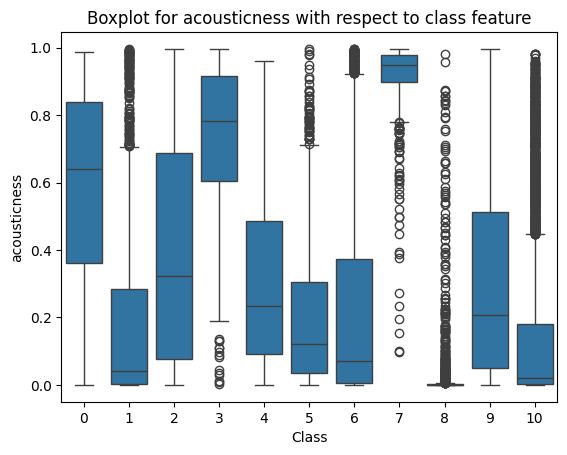

<Figure size 400x600 with 0 Axes>

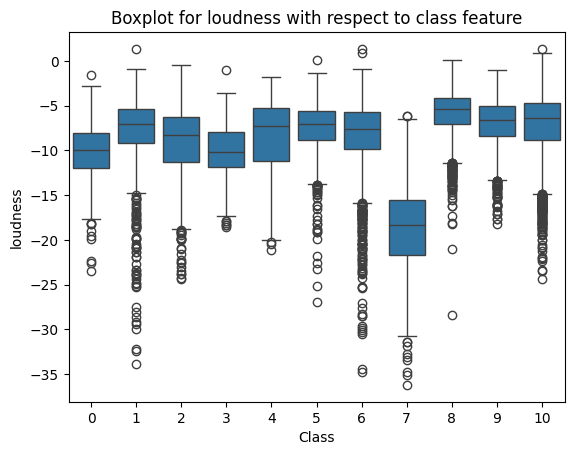

<Figure size 400x600 with 0 Axes>

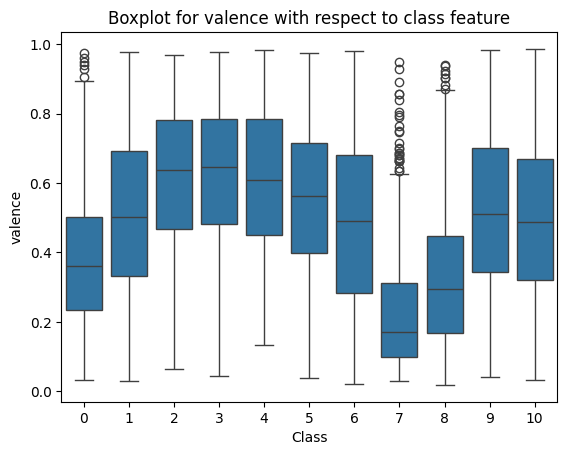

<Figure size 400x600 with 0 Axes>

In [10]:
columns_notype = set(df.columns) - set(['Artist Name', 'Track Name', 'Class', 'mode','time_signature'])
columns_notype = list(columns_notype)

for col in columns_notype:
    sns.boxplot(df, x = 'Class', y = col)
    plt.title("Boxplot for " + col + " with respect to class feature")
    plt.figure(figsize=(4, 6))
    plt.show()

In [11]:
outlier_info = {}

for cls in range(10):
    outlier_info[cls] = {}
    
    
    class_data = df[df['Class'] == cls]
    
    
    for column in columns_notype:
        if column == 'Class':
            continue  # Skip the class column

        
        Q1 = class_data[column].quantile(0.25)
        Q3 = class_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = class_data[(class_data[column] < lower_bound) | (class_data[column] > upper_bound)]
        
        
        outlier_info[cls][column] = {
            'count': len(outliers),
            'values': outliers[column].tolist()
        }

print("outlier_info is saved")

outlier_info is saved


In [12]:
os.makedirs('dumps', exist_ok=True)


with open('dumps/outliers_info.txt', 'w') as file:
    for cls, features in outlier_info.items():
        file.write(f"Class: {cls}\n")
        for feature, info in features.items():
            file.write(f"  Feature: {feature}\n")
            file.write(f"    Outliers Count: {info['count']}\n")
            file.write(f"    Outlier Values: {info['values']}\n\n")

print("Outlier information exported to 'dumps/outliers_info.txt'")

Outlier information exported to 'dumps/outliers_info.txt'


# Data Precrocessing


#### Variable delcaration

In [13]:
X = df.drop("Class", axis=1)
y = df["Class"]

numeric_features = [
      "Popularity", "danceability", "energy", "loudness", "speechiness", 
      "acousticness", "liveness", "valence", "tempo", "duration_in min/ms", "time_signature"
]
# I didnt include key and mode features here

#### MinMax Scaling

In [14]:
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

normalized_df = pd.concat([X,y], axis=1)
normalized_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.595960,0.854698,0.563991,1.0,0.831803,1,0.027882,0.017169,0.073879,0.910096,0.553969,0.158812,0.75,5
1,Boston,Hitch a Ride,0.535354,0.346680,0.813996,3.0,0.771487,1,0.019410,0.001104,0.090173,0.569081,0.459689,0.170413,0.75,10
2,The Raincoats,No Side to Fall In,0.343434,0.402648,0.613992,6.0,0.742101,1,0.032172,0.487952,0.386702,0.794358,0.626804,0.074240,0.75,6
3,Deno,Lingo (feat. J.I & Chunkz),0.656566,0.853622,0.596992,10.0,0.790173,0,0.035389,0.021285,0.111426,0.569081,0.409271,0.117769,0.75,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.525253,0.115273,0.974999,2.0,0.850036,1,0.207507,0.000170,0.162028,0.075953,0.901766,0.155674,0.75,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.343434,0.114197,0.108982,7.0,0.508771,0,0.020161,0.996988,0.087542,0.163997,0.754740,0.130958,0.50,6
17992,Micatone,All Gone,0.262626,0.622215,0.222984,11.0,0.693125,0,0.011153,0.861446,0.059306,0.327271,0.227225,0.174024,0.75,2
17993,Smash Hit Combo,Peine perdue,0.333333,0.536110,0.981000,4.0,0.839282,0,0.052225,0.000030,0.661978,0.251834,0.398391,0.146374,0.75,8
17994,Beherit,Salomon's Gate,0.282828,0.166936,0.804996,6.0,0.624371,0,0.119571,0.001295,0.247040,0.347938,0.539476,0.148724,0.75,8


# Exploratory Data Analysis

In [ ]:
new_df = normalized_df.drop(['Artist Name', 'Track Name', 'Class', 'mode','time_signature'], axis=1)
new_df

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms
0,60.0,0.854,0.564,1.0,-4.964,0.0485,0.017100,0.0849,0.8990,134.071,234596.0
1,54.0,0.382,0.814,3.0,-7.230,0.0406,0.001100,0.1010,0.5690,116.454,251733.0
2,35.0,0.434,0.614,6.0,-8.334,0.0525,0.486000,0.3940,0.7870,147.681,109667.0
3,66.0,0.853,0.597,10.0,-6.528,0.0555,0.021200,0.1220,0.5690,107.033,173968.0
4,53.0,0.167,0.975,2.0,-4.279,0.2160,0.000169,0.1720,0.0918,199.060,229960.0
...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0.0413,0.993000,0.0984,0.1770,171.587,193450.0
17992,27.0,0.638,0.223,11.0,-10.174,0.0329,0.858000,0.0705,0.3350,73.016,257067.0
17993,34.0,0.558,0.981,4.0,-4.683,0.0712,0.000030,0.6660,0.2620,105.000,216222.0
17994,29.0,0.215,0.805,6.0,-12.757,0.1340,0.001290,0.2560,0.3550,131.363,219693.0


In [16]:
correlation_matrix = new_df[new_df.columns[1:]].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

C:\Users\baday\AppData\Local\Temp\ipykernel_11648\1034098088.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms
danceability,1.000,-0.102,0.007,0.052,0.201,0.014,-0.110,0.443,-0.187,-0.128
energy,-0.102,1.000,0.015,0.767,0.124,-0.744,0.194,0.221,0.209,0.236
key,0.007,0.015,1.000,0.003,0.002,-0.010,0.015,0.030,0.012,0.013
loudness,0.052,0.767,0.003,1.000,0.095,-0.610,0.110,0.178,0.162,0.163
speechiness,0.201,0.124,0.002,0.095,1.000,-0.086,0.068,0.053,0.047,-0.000
acousticness,0.014,-0.744,-0.010,-0.610,-0.086,1.000,-0.110,-0.122,-0.167,-0.315
liveness,-0.110,0.194,0.015,0.110,0.068,-0.110,1.000,0.020,0.032,0.050
valence,0.443,0.221,0.030,0.178,0.053,-0.122,0.020,1.000,0.049,-0.102
tempo,-0.187,0.209,0.012,0.162,0.047,-0.167,0.032,0.049,1.000,0.043
duration_in min/ms,-0.128,0.236,0.013,0.163,-0.000,-0.315,0.050,-0.102,0.043,1.000


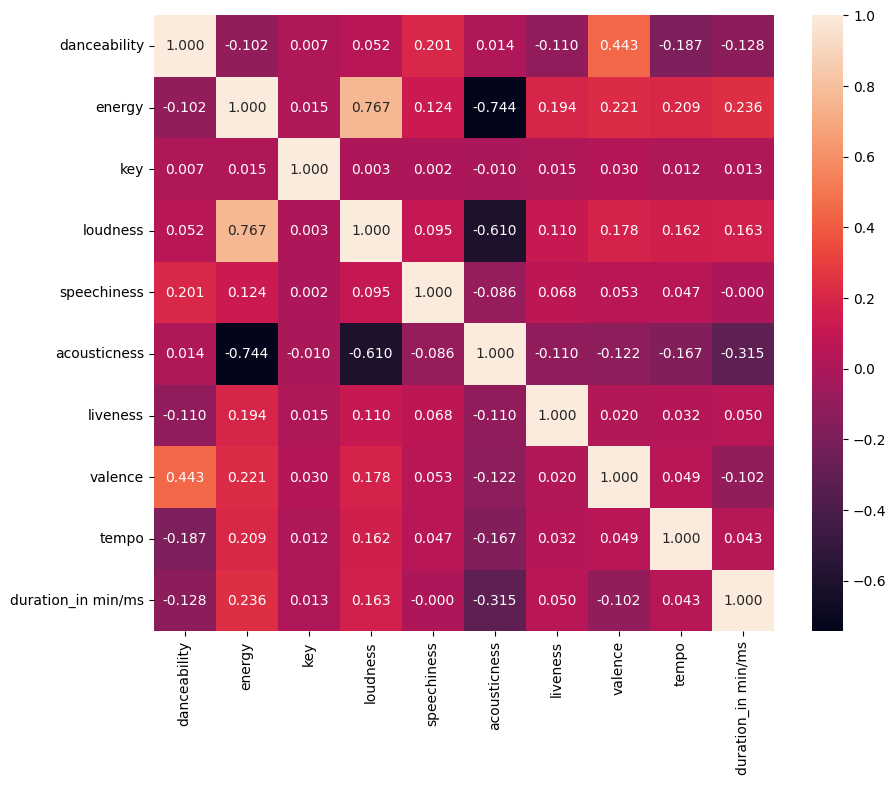

In [17]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust dimensions as needed

# Create the boxplot
sns.boxplot(data=df, x='Artist Name', y='Popularity')
plt.title('Popularity with Respect to the Artist')

# Save the plot to a file
plt.savefig("popularity_vs_artist.png", format='png', dpi=300)  # Change format and dpi as needed

# Show the plot
plt.show()


KeyboardInterrupt: 

In [ ]:
artist_popularity = df.groupby('Artist Name')['Popularity'].mean().sort_values(ascending=True)

# Write to file with "Artist: Mean" format
with open("artist_mean_popularity.txt", "w", encoding="utf-8") as file:
    for artist, mean in artist_popularity.items():
        file.write(f"{artist}: {mean}\n")